## College Day-1 (Open source CLub) ...Mohammed Hamdan M

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('gpa_study_hours.csv')

In [15]:
x=data[["study_hours"]]
y=data["gpa"]

In [16]:
x


,study_hours
0,10.0
1,25.0
2,45.0
3,10.0
4,4.0
...,...
188,24.0
189,12.0
190,15.0
191,10.0


In [17]:
y

0      4.00
1      3.80
2      3.93
3      3.40
4      3.20
       ... 
188    3.60
189    3.70
190    3.84
191    3.80
192    3.10
Name: gpa, Length: 193, dtype: float64

Split the Data


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


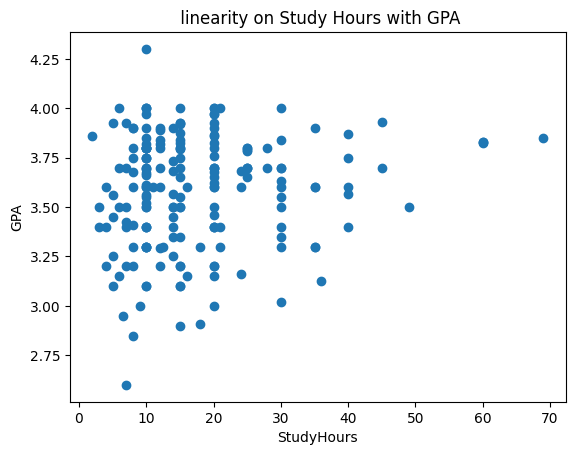

In [8]:
plt.scatter(data['study_hours'], data['gpa'])
plt.xlabel('StudyHours')
plt.ylabel('GPA')
plt.title(' linearity on Study Hours with GPA')
plt.show()


In [9]:
correlation = df['gpa'].corr(df['study_hours'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.13301377742137005


hence it seems to be slightly positively correlated


In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Model Initialization
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svr = SVR()

In [21]:
# Model Training
linear_reg.fit(X_train_scaled, y_train)
decision_tree_reg.fit(X_train_scaled, y_train)
random_forest_reg.fit(X_train_scaled, y_train)
svr.fit(X_train_scaled, y_train)

SVR()

In [22]:
# Make Predictions
linear_pred = linear_reg.predict(X_test_scaled)
decision_tree_pred = decision_tree_reg.predict(X_test_scaled)
random_forest_pred = random_forest_reg.predict(X_test_scaled)
svr_pred = svr.predict(X_test_scaled)


In [23]:
# Evaluate Linear Reg
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

In [24]:
print("Linear Regression:")
print("MAE:", linear_mae)
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)

Linear Regression:
MAE: 0.20957829934595196
RMSE: 0.256756626719963
R-squared: 0.0026815080017581483


In [25]:
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "SVR"]
r2_scores = [linear_r2, r2_score(y_test, decision_tree_pred), r2_score(y_test, random_forest_pred), r2_score(y_test, svr_pred)]

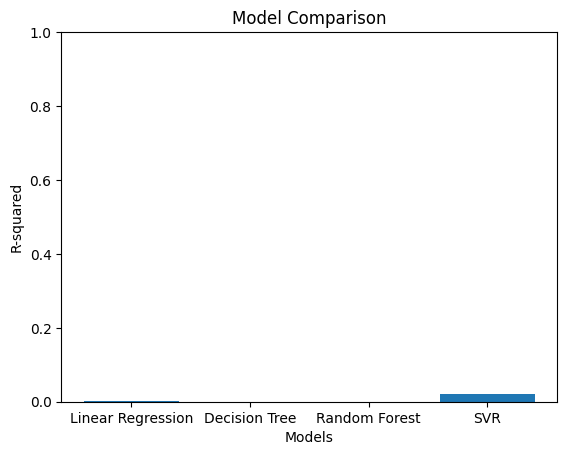

In [26]:
plt.bar(model_names, r2_scores)
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Model Comparison")
plt.ylim(0, 1)  # Set y-axis limits for R-squared
plt.show()

## to evaluate every model

Linear Regression R-squared: 0.0027
Decision Tree R-squared: -0.1392
Random Forest R-squared: -0.0650
SVR R-squared: 0.0211


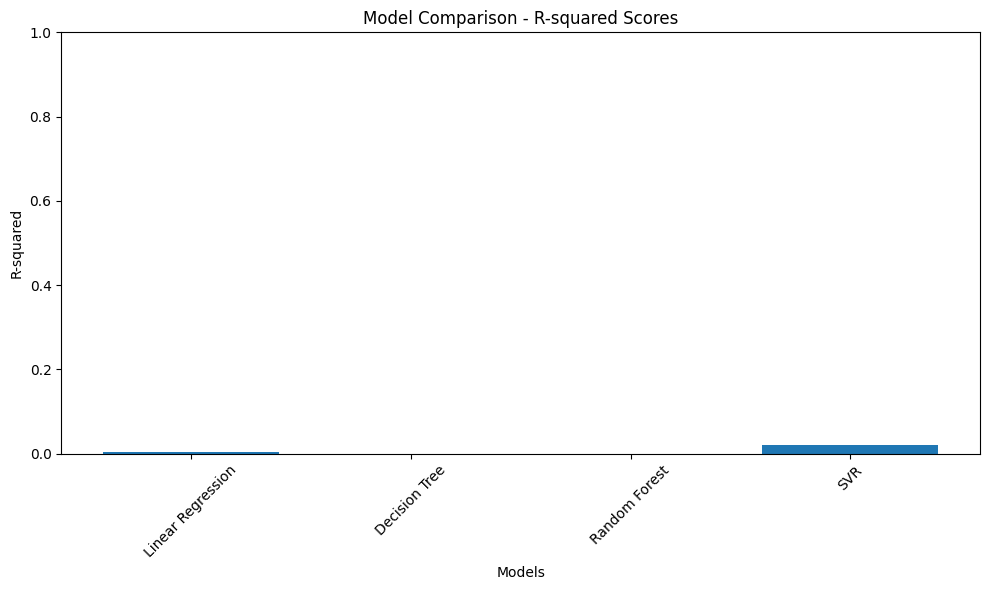

In [27]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("SVR", SVR())
]

# Dictionary to store R-squared scores
r2_scores = {}

# Train and Evaluate Models
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2
    print(f"{name} R-squared: {r2:.4f}")

# Plot R-squared Scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values())
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Model Comparison - R-squared Scores")
plt.ylim(0, 1)  # Set y-axis limits for R-squared
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


